In [ ]:
!pip install neattext

     |████████████████████████████████| 114 kB 4.2 MB/s 


In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 4.1 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 10.1 MB 44.0 MB/s 
     |████████████████████████████████| 1.8 MB 37.4 MB/s 
     |████████████████████████████████| 6.6 MB 42.9 MB/s 
     |████████████████████████████████| 325 kB 49.3 MB/s 
     |████████████████████████████████| 1.2 MB 40.9 MB/s 
     |████████████████████████████████| 4.0 MB 38.7 MB/s 
     |████████████████████████████████| 895 kB 41.0 MB/s 
     |████████████████████████████████| 596 kB 43.2 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 144 kB 45.3 MB/s 
     |████████████████████████████████| 181 kB 51.2 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 136 kB 36.5 MB/s 
     |████████████████████████████████| 1.1 MB 27.8 MB/s 
     |████████████████████████████████| 212 kB 41.0 MB/s 
     |██████████████

In [ ]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import matplotlib.pyplot as plt
from neattext.pipeline import TextPipeline
from neattext import TextMetrics
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet, stopwords

import imblearn.under_sampling as under
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.utils import resample
from sklearn import preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB,CategoricalNB 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import preprocessing

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### **Loading DataSet**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/niyaryca/AMLDataset/main/processed_reviews_split_surnamesJ_minimal.csv')
data.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,I can't even remember the first time I finishe...,False,5.0,video_games
1,product_review_000001,Ernie Ball's Electric Acoustic sound dull. I h...,True,-1.0,musical_instruments
2,product_review_000002,Anyone who buys this game because it's markete...,False,5.0,video_games
3,product_review_000003,The system had a burn in the screen and kept g...,True,3.0,video_games
4,product_review_000004,As this is a remake/remaster review I will not...,True,-1.0,video_games


# **Explanatory Data Analysis**

In [ ]:
data_filtered = data.copy()
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32918 entries, 0 to 32917
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         32918 non-null  object 
 1   text              32908 non-null  object 
 2   verified          32797 non-null  object 
 3   review_score      32918 non-null  float64
 4   product_category  32012 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


**It can be noticed that there are some null values present in some columns. So, let's check with each columns**

---



### **Review ID Column**

In [ ]:
data['review_id'].describe()

count                     32918
unique                    32918
top       product_review_000000
freq                          1
Name: review_id, dtype: object

All the ids are unique.

### **Ratings Column**

In [ ]:
data['review_score'].describe()

count    32918.000000
mean         4.089009
std          1.435505
min         -1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [ ]:
print(data['review_score'].value_counts())

 5.0    19280
 4.0     6205
 3.0     3109
 1.0     1872
 2.0     1545
-1.0      907
Name: review_score, dtype: int64


The reviews are negative as well which maybe an error so making the rows with negative values null.

In [ ]:
review_score_nulls = data_filtered[data_filtered.review_score<0] #for excluded data
review_score_nulls['reason_for_exclusion'] = 'invalid'
review_score_nulls['excluded'] = 1

data_filtered = data_filtered.drop(data_filtered[data_filtered.review_score<0].index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### **Prodcut Category Column**

In [ ]:
data['product_category'].unique()

array(['video_games', 'musical_instruments', nan], dtype=object)

There are some null values present in this column.

### **Reviews Column**

In [ ]:
data['text'].describe()

count                                                 32908
unique                                                30159
top       i would have gave it 5  out of 5 but u play th...
freq                                                      3
Name: text, dtype: object

It is seen that there are thousands of duplicated reviews, so removing those entries.

In [ ]:
duplicated_rows = data_filtered[data_filtered.duplicated(subset=['text'],keep='last')] #for excluded data
duplicated_rows['reason_for_exclusion'] = 'duplicated'
duplicated_rows['excluded'] = 1
data_filtered = data_filtered.drop_duplicates(subset=['text'],keep='first')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### **Verified Account Column**

In [ ]:
data_filtered['verified'].value_counts()

True     21361
False     8692
Name: verified, dtype: int64

Taking values with only verified accounts because there are alot of people that just are there to share their thoughts even after buying it from another seller, so unverified data present in Amazon that may hamper the quality of the data.

In [ ]:
unverified = data_filtered[data_filtered.verified==False] #for excluded data
unverified['reason_for_exclusion'] = 'other'
unverified['excluded'] = 1
data_filtered = data_filtered.drop(data_filtered[data_filtered.verified == False].index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### **Removing data with null values**

**Removing data where the reviews are null because nothing can be done for that as the whole prediction depends on quality data**

In [ ]:
null_values = data_filtered[data_filtered.isna().any(axis=1)] #for excluded data
null_values['reason_for_exclusion'] = 'missing_value_or_label'
null_values['excluded'] = 1
data_filtered = data_filtered.dropna()

print( 'Removed Rows: ' + str(data.shape[0] - data_filtered.shape[0]))

Removed Rows: 11880


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### **`11,880 rows were removed after EDA.`**

---


### **Exporting Excluded data**

In [ ]:
from google.colab import drive
drive.mount('drive')

deleted = pd.concat([null_values,unverified,duplicated_rows,review_score_nulls])
accepted_data = data_filtered.copy()
accepted_data['reason_for_exclusion'] = 'N/A'
accepted_data['excluded'] = 0

excluded_data = pd.concat([accepted_data,deleted])
excluded_data = excluded_data.sort_index()
excluded_data.drop(['text', 'verified','review_score','product_category'], axis=1, inplace=True)

excluded_data.to_csv('/content/drive/My Drive/excluded_data.csv', encoding='utf-8', index=False)

## **Exploratory Data Analysis**

### ***Product Category***

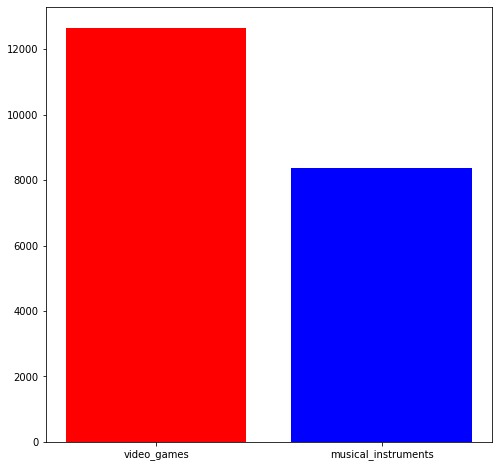



video_games            12658
musical_instruments     8380
Name: product_category, dtype: int64


In [ ]:
category_classes = data_filtered.product_category.unique()
category_counts = []

for i in category_classes:
  count = len(data_filtered[data_filtered.product_category==i])
  category_counts.append(count)

plt.figure(figsize=(8, 8))
plt.bar(category_classes,category_counts,color=['red','blue'])
plt.show()

print('\n')
print(data_filtered['product_category'].value_counts())

### ***Rating Score Proportions***

In [ ]:
rating_classes = data_filtered.review_score.unique()
rating_counts = []

for i in rating_classes:
  count = len(data_filtered[data_filtered.review_score==i])
  rating_counts.append(count)

print('\n')
print(data_filtered['review_score'].value_counts())



5.0    13653
4.0     3750
3.0     1816
1.0      982
2.0      837
Name: review_score, dtype: int64


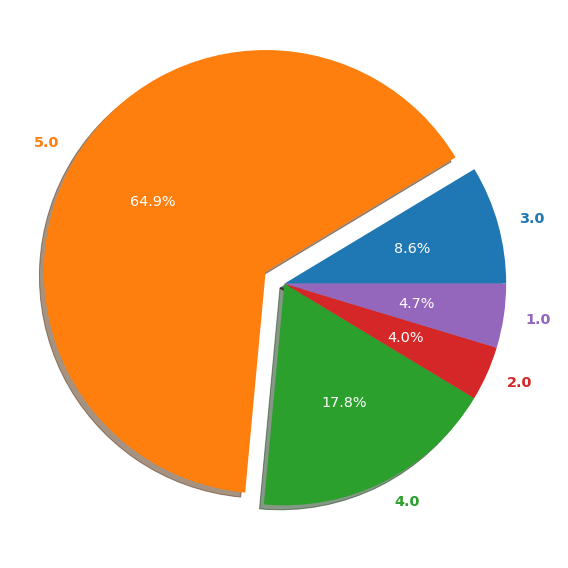

In [ ]:
explode = [0, 0.1, 0, 0, 0]
fig, ax = plt.subplots(figsize=(8, 8))

patches, texts, pcts = ax.pie(
    rating_counts, labels=rating_classes, autopct='%.1f%%',
    textprops={'size': 'x-large'}
    ,shadow=True,explode=explode)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=1000)
plt.tight_layout()

### ***Review Text Distribution***

count    21038.000000
mean        70.767326
std        131.542871
min          1.000000
25%         14.000000
50%         34.000000
75%         73.000000
max       3076.000000
Name: word_count, dtype: float64
51 bins


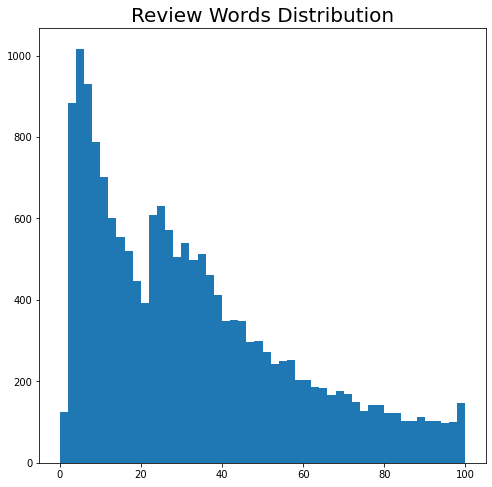

In [ ]:
data_filtered['review_len'] = data_filtered['text'].astype(str).apply(len)
data_filtered['word_count'] = data_filtered['text'].apply(lambda x: len(str(x).split()))
print(data_filtered['word_count'].describe())

x_min = 0
x_max = 100
bin_width = 2

n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

plt.figure(figsize=(8, 8))
plt.hist(data_filtered['word_count'], bins)
plt.title('Review Words Distribution', fontsize=20)
plt.show()

# **Text Preprocessing**

In [ ]:
processed_data = data_filtered.copy()
processed_data.shape, data.shape

((21038, 7), (32918, 5))

### **Removing Stopwords, Special Characters, emojis, emails, numbers, phone numbers, html tags, punctuations, urls, address**

---

In [ ]:
def preprocess(document):
    docx= document.apply(nfx.normalize)
    docx= docx.apply(nfx.remove_puncts)
    docx= docx.apply(nfx.remove_stopwords)
    docx= docx.apply(nfx.remove_html_tags)
    docx= docx.apply(nfx.remove_special_characters)
    docx= docx.apply(nfx.remove_emojis)
    docx= docx.apply(nfx.fix_contractions)
    docx= docx.apply(nfx.remove_emails)
    docx= docx.apply(nfx.remove_numbers)
    docx= docx.apply(nfx.remove_phone_numbers)
    docx= docx.apply(nfx.remove_btc_address)
    docx= docx.apply(nfx.remove_urls)
    return docx.str.lower()

processed_data['clean_reviews'] = preprocess(processed_data['text'])

**Comparing with the original text**

In [ ]:
processed_data[['clean_reviews','text']].head()

,clean_reviews,text
3,system burn screen kept going usb mode way fix...,The system had a burn in the screen and kept g...
5,good happy,It's good. Happy To Have It
7,love thx perfect love thx perfect,i love it thx its perfect. i love it thx its p...
8,flimsy thought getting orange ones oh know des...,Flimsy. Thought I was getting the Orange ones....
11,course best perfect controls great original le...,... so of course it's the best. Perfect contro...


In [ ]:
def get_wordnet_pos(word):
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

  return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = nltk.stem.WordNetLemmatizer()
def get_lemmatize(sent):
  return " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sent)])

In [ ]:
processed_data['review_cleaned_lemmatized'] = processed_data['clean_reviews'].apply(get_lemmatize)

### **Splitting data to test & train sets**

In [ ]:
reviews = processed_data['review_cleaned_lemmatized']
rating_labels = processed_data['review_score']
label_encoder = preprocessing.LabelEncoder()
 
processed_data['product_category_encoded']= label_encoder.fit_transform(processed_data['product_category'])
category_labels = processed_data['product_category_encoded']
reviews_train,reviews_test,category_train,category_test,rating_train_imbalanced,rating_test_imbalanced = train_test_split(reviews,category_labels,rating_labels, test_size=0.2,random_state=42, shuffle=True)


### **Under Sampling Rating:**

In [ ]:
df_five = processed_data[(processed_data['review_score']==5)]
df_four = processed_data[(processed_data['review_score']==4)] 
df_three = processed_data[(processed_data['review_score']==3)] 
df_two = processed_data[(processed_data['review_score']==2)] 
df_one = processed_data[(processed_data['review_score']==1)]

df_five_undersampled = resample(df_five,
                              replace=True,
                              n_samples= 837,
                              random_state=42)
df_four_undersampled = resample(df_four,
                              replace=True,
                              n_samples= 837,
                              random_state=42)
df_three_undersampled = resample(df_three,
                              replace=True,
                              n_samples= 837,
                              random_state=42)
df_one_undersampled = resample(df_one,
                              replace=True,
                              n_samples= 837,
                              random_state=42)
df_undersampled_log = pd.concat([df_one_undersampled, df_three_undersampled,df_five_undersampled,df_four_undersampled, df_two])
print(df_undersampled_log['review_score'].value_counts())

rating_labels = df_undersampled_log['review_score']
reviews_train_star,reviews_test_star,rating_train,rating_test = train_test_split(df_undersampled_log['review_cleaned_lemmatized'],rating_labels, test_size=0.20,random_state=42, shuffle=True)


1.0    837
3.0    837
5.0    837
4.0    837
2.0    837
Name: review_score, dtype: int64


# **1st Method (Logistic Regression)**

### **Hyper Parameter Tuning for Rating Predictor:**

In [ ]:
logreg =  LogisticRegression()
grid=[{
       'C': [0.01, 0.1, 1],
      'solver': ['lbfgs', 'liblinear', 'adam','saga'],
      'max_iter' : [10,100, 500, 1000]}]
lr = GridSearchCV(logreg, param_grid = grid, cv = 5, scoring='accuracy', verbose = 1, n_jobs = -1)

vectorizer = CountVectorizer()
vectorizer.fit(reviews_train_star)

X_train = vectorizer.transform(reviews_train_star)
X_test = vectorizer.transform(reviews_test_star)

best_model = lr.fit(X_train, rating_train)

print(best_model.best_estimator_)
print(best_model.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 436, in _check_solver
    % (all_solvers, solver)
ValueError: L

LogisticRegression(C=1, max_iter=500, solver='saga')
0.5155313120496174


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### **Hyper Parameter Tuning for Category Predictor:**

In [ ]:
logreg =  LogisticRegression()
grid=[{
       'C': [0.01, 0.1, 1],
      'solver': ['lbfgs', 'liblinear', 'adam','saga'],
      'max_iter' : [10,100, 500, 1000]}]
lr = GridSearchCV(logreg, param_grid = grid, cv = 5, scoring='accuracy', verbose = 1, n_jobs = -1)

vectorizer = CountVectorizer()
vectorizer.fit(reviews_train_star)

X_train = vectorizer.transform(reviews_train)
X_test = vectorizer.transform(reviews_test)

best_model = lr.fit(X_train, category_train)

print(best_model.best_estimator_)
print(best_model.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 436, in _check_solver
    % (all_solvers, solver)
ValueError: L

LogisticRegression(C=1)
0.9155674390968509


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### **Creating a Pipeline**

In [ ]:
logreg_rating = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=1, max_iter=500, solver='saga')),
               ])

logreg_category = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=1)),
               ])

## **Product Category Prediction**

### ***Training Set***

Accuracy: 0.967, Precision: 0.974, Recall: 0.971, F1 Score: 0.972


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


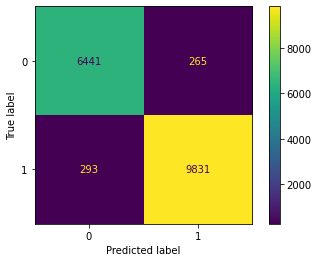

In [ ]:
logistic_model_category = logreg_category.fit(reviews_train,category_train)
category_prediction_train = logistic_model_category.predict(reviews_train)
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(category_train, category_prediction_train), 
                                                                                        precision_score(category_train, category_prediction_train,average="binary"), 
                                                                                        recall_score(category_train, category_prediction_train,average="binary"), 
                                                                                        f1_score(category_train, category_prediction_train,average="binary")))
plot_confusion_matrix(logistic_model_category,reviews_train,category_train)

### ***Testing Set***

In [ ]:
category_prediction_test = logistic_model_category.predict(reviews_test)

### **Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


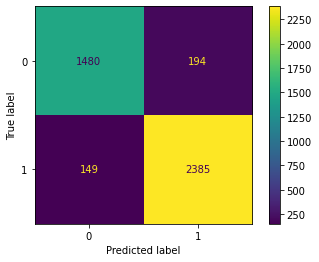

In [ ]:
plot_confusion_matrix(logistic_model_category,reviews_test,category_test)

### **Classification Report**

In [ ]:
print(classification_report(category_test,category_prediction_test))


              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1674
           1       0.92      0.94      0.93      2534

    accuracy                           0.92      4208
   macro avg       0.92      0.91      0.91      4208
weighted avg       0.92      0.92      0.92      4208



### **ROC Curve for Product Category**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def roc_classifier(grid, X_train, y_train, X_test, y_test):
    # predict probabilities
    lr_probs_train = grid.predict_proba(X_train)
    lr_probs_test = grid.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs_train = lr_probs_train[:, 1]
    lr_probs_test = lr_probs_test[:, 1]

    print('ROC AUC (Training)={:.3f}'.format(roc_auc_score(y_train, lr_probs_train,multi_class='ovo')))
    print('ROC AUC (Testing)={:.3f}'.format(roc_auc_score(y_test, lr_probs_test,multi_class='ovo')))

    # compute false positive and true positive rates
    lr_fpr_train, lr_tpr_train, _ = roc_curve(y_train, lr_probs_train)
    lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test, lr_probs_test)

    # plot the roc curve for the training set
    _ = plt.figure(figsize=(15, 5))
    ax1 =plt.subplot(121)
    _ = ax1.plot(lr_fpr_train, lr_tpr_train, marker='x')
    _ = ax1.plot([0,1], [0, 1], 'gray', linestyle=':', marker='')
    _ = ax1.set_title('Receiver Operating Characteristics (ROC) - Training')
    _ = ax1.set_xlabel('False Positive Rate')
    _ = ax1.set_ylabel('True Positive Rate')

    # plot the roc curve for the testing set
    ax2 = plt.subplot(122)
    _ = ax2.plot(lr_fpr_test, lr_tpr_test, marker='x')
    _ = ax2.plot([0,1], [0, 1], 'gray', linestyle=':', marker='')
    _ = ax2.set_title('Receiver Operating Characteristics (ROC) - Testing')
    _ = ax2.set_xlabel('False Positive Rate')
    _ = ax2.set_ylabel('True Positive Rate')

    return (lr_probs_train, lr_fpr_train, lr_tpr_train, 
            lr_probs_test,  lr_fpr_test, lr_tpr_test)


ROC AUC (Training)=0.993
ROC AUC (Testing)=0.976


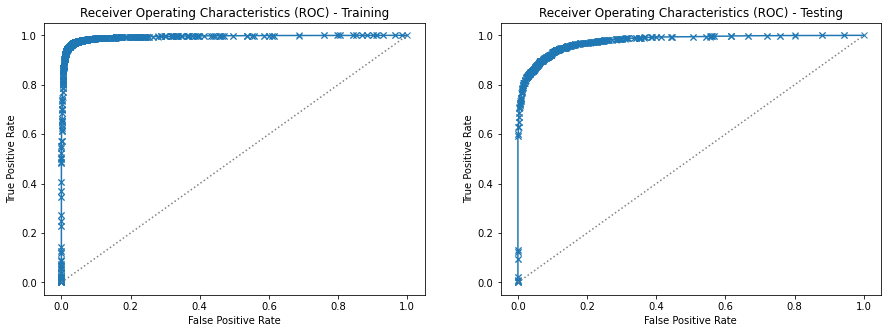

In [ ]:
lr_probs_train, lr_fpr_train, lr_tpr_train, lr_probs_test, lr_fpr_test, lr_tpr_test = roc_classifier(
                                                                    logistic_model_category, reviews_train, category_train, reviews_test, category_test)

## **Star Rating Prediction**

### **Evaluating with Imbalanced Data for Rating Prediction**

In [ ]:
logistic_model_rating_imbalanced = logreg_rating.fit(reviews_train, rating_train_imbalanced)

(4208,) (4208,)


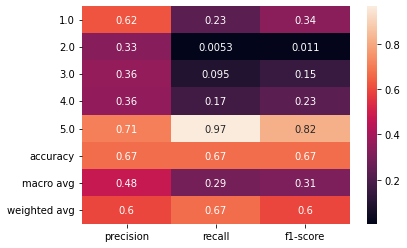

In [ ]:
rating_prediction = logistic_model_rating_imbalanced.predict(reviews_test)

print(rating_test_imbalanced.shape,rating_prediction.shape)
clf_report = classification_report(rating_test_imbalanced,rating_prediction,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

### **Training with balanced data**

In [ ]:
logistic_model_rating = logreg_rating.fit(reviews_train_star, rating_train)

### ***Training Set***

In [ ]:
rating_prediction_train = logistic_model_rating.predict(reviews_train_star)

### **Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


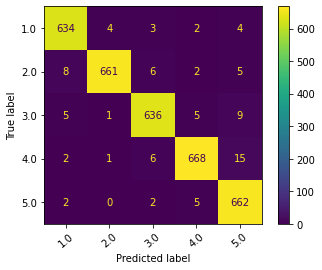

In [ ]:
plot_confusion_matrix(logistic_model_rating,reviews_train_star,rating_train,xticks_rotation=40)

### **Classification Report**

In [ ]:
print(classification_report(rating_prediction_train,rating_train))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.98       651
         2.0       0.97      0.99      0.98       667
         3.0       0.97      0.97      0.97       653
         4.0       0.97      0.98      0.97       682
         5.0       0.99      0.95      0.97       695

    accuracy                           0.97      3348
   macro avg       0.97      0.97      0.97      3348
weighted avg       0.97      0.97      0.97      3348



### ***Testing Set***

In [ ]:
rating_prediction_test = logistic_model_rating.predict(reviews_test_star)

### **Metrics**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


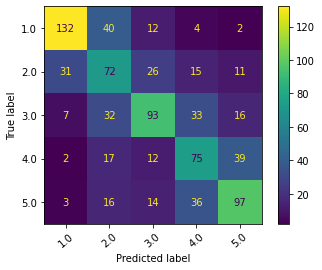

In [ ]:
plot_confusion_matrix(logistic_model_rating,reviews_test_star,rating_test,xticks_rotation=40)

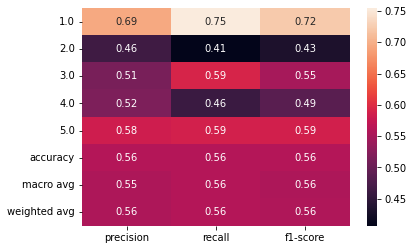

In [ ]:
clf_report = classification_report(rating_prediction_test,rating_test,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# **Evaluation of the Models**

In [ ]:
def predict_Logisitic_Model(evaluation_data):
  category_prediction_v = logistic_model_category.predict(evaluation_data['review_cleaned_lemmatized'])
  rating_prediction_v = logistic_model_rating.predict(evaluation_data['review_cleaned_lemmatized'])
  print("Logistic Regression Model: ")
  print("/n Predicted Rating: ")
  print(rating_prediction_v)
  print(" Actual Rating: ")
  print(evaluation_data['review_score'].values)
  print("/n Predicted Category: ")
  print(category_prediction_v)
  print(" Actual Category: ")
  print(evaluation_data['product_category_encoded'].values)
  print("Accuracy for Categories: "+ str((accuracy_score(evaluation_data['product_category_encoded'],category_prediction_v))*100))
  print("Accuracy for Ratings: "+ str((accuracy_score(evaluation_data['review_score'],rating_prediction_v)*100)))

In [ ]:
test_data = reviews_test_star.sample(10)
index = test_data.index
evaluation_data =pd.DataFrame()
for i in index:
  evaluation_data = evaluation_data.append(df_undersampled_log[df_undersampled_log.index == i])
  evaluation_data = evaluation_data.drop_duplicates()
predict_Logisitic_Model(evaluation_data)

Logistic Regression Model: 
/n Predicted Rating: 
[4. 1. 1. 3. 5. 5. 2. 1. 1. 2.]
 Actual Rating: 
[5. 1. 1. 5. 4. 4. 3. 3. 1. 4.]
/n Predicted Category: 
[0 1 0 1 0 0 1 1 1 0]
 Actual Category: 
[0 1 0 1 0 0 1 1 1 1]
Accuracy for Categories: 90.0
Accuracy for Ratings: 30.0


# **Bert**

## **Product Category Prediction**

### **Oversampling Product Categories**

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
data_filtered['product_category_encoded']= label_encoder.fit_transform(data_filtered['product_category'])

df_video = data_filtered[(data_filtered['product_category_encoded']==1)]
df_music = data_filtered[(data_filtered['product_category_encoded']==0)]
df_minority_upsampled = resample(df_music, 
                                 replace=True,
                                 n_samples= 12476,
                                 random_state=42) 


df_oversampled = pd.concat([df_minority_upsampled, df_video])
df_oversampled['product_category_encoded'].value_counts()

1    12658
0    12476
Name: product_category_encoded, dtype: int64

### **Splitting the data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_oversampled['text'],df_oversampled['product_category_encoded'], test_size = 0.2)

### **Hyper Parameter Tuning:**

In [ ]:
model_args = ClassificationArgs()
model_args.num_train_epochs = 3
model_args.learning_rate = 1e-5
model_args.train_batch_size = 32
model_args.eval_batch_size = 32
model_args.max_seq_length = 128
model_args.warmup = 600
model_args.overwrite_output_dir = True
model_args.do_lower_case = True

### **Training Model**

In [ ]:
bert_model = ClassificationModel("bert", "bert-base-cased",num_labels = 2,args=model_args,use_cuda=True)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
train_df = pd.DataFrame({"text":x_train, "labels":y_train})
eval_df = pd.DataFrame({"text":x_test, "labels":y_test})

In [ ]:
bert_model.train_model(train_df, acc=accuracy_score)

  0%|          | 0/20107 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/629 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/629 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/629 [00:00<?, ?it/s]

(1887, 0.14372184172634636)

### **Testing Model**

In [ ]:
result, model_outputs, wrong_predictions = bert_model.eval_model(eval_df, acc=accuracy_score)

  0%|          | 0/5027 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/158 [00:00<?, ?it/s]

In [ ]:
x_testval = x_test.dropna()
x_testval = x_testval.tolist()
preds, model_ouputs = bert_model.predict(x_testval)

  0%|          | 0/5027 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

### **Metrics**

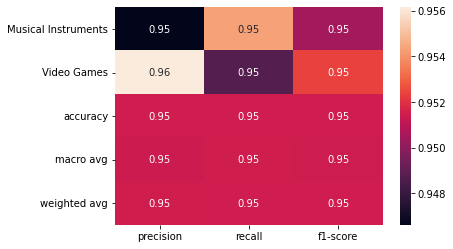

In [ ]:
clf_report = classification_report(y_test,
                                   preds,
                                   target_names=['Musical Instruments', 'Video Games'],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

## **Validation:**

In [ ]:
def predict_category(review_text):
  output_category, model_ouputs = bert_model.predict(review_text)
  print("1 is for Video Games & 0 is for Musical Instruments")
  print(output_category)

validate_category = np.array(x_test.sample(10).values)
list_vals = validate_category.tolist()
predict_category(list_vals)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

1 is for Video Games & 0 is for Musical Instruments
[1 0 0 1 0 0 1 1 0 0]


## **Star Rating Prediction**

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df_five = data_filtered[(data_filtered['review_score']==5)]
df_four = data_filtered[(data_filtered['review_score']==4)] 
df_three = data_filtered[(data_filtered['review_score']==3)] 
df_two = data_filtered[(data_filtered['review_score']==2)] 
df_one = data_filtered[(data_filtered['review_score']==1)]

df_five_undersampled = resample(df_five,
                              replace=True,
                              n_samples= 837,
                              random_state=42)  # reproducible results
df_four_undersampled = resample(df_four,
                              replace=True,
                              n_samples= 837,
                              random_state=42)
df_three_undersampled = resample(df_three,
                              replace=True,
                              n_samples= 837,
                              random_state=42)
df_one_undersampled = resample(df_one,
                              replace=True,
                              n_samples= 837,
                              random_state=42)
# Combine majority class with upsampled minority class
df_undersampled = pd.concat([df_one_undersampled, df_three_undersampled,df_five_undersampled,df_four_undersampled, df_two])
df_undersampled['review_score'].value_counts()
df_undersampled['review_score_encoded']= label_encoder.fit_transform(df_undersampled['review_score'])

### **Splitting Data**

In [ ]:
x_star_train, x_star_test, y_star_train, y_star_test = train_test_split(df_undersampled['text'],df_undersampled['review_score_encoded'], test_size = 0.2)

### **Hyper Parameter Tuning**

In [ ]:
model_args_star = ClassificationArgs()
model_args_star.num_train_epochs = 3
model_args_star.learning_rate = 1e-4
model_args_star.train_batch_size = 32
model_args_star.eval_batch_size = 32
model_args_star.max_seq_length = 128
model_args_star.warmup = 600
model_args_star.overwrite_output_dir = True
model_args_star.optimizer = 'AdamW'
model_args_star.do_lower_case = True

### **Train Model**

In [ ]:
bert_star_model = ClassificationModel("roberta", "roberta-base",num_labels = 5,args=model_args_star,use_cuda=True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
train_df_star = pd.DataFrame({"text":x_star_train, "labels":y_star_train})
eval_df_star = pd.DataFrame({"text":x_star_test, "labels":y_star_test})

In [ ]:
bert_star_model.train_model(train_df_star, acc=accuracy_score)

  0%|          | 0/3348 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/105 [00:00<?, ?it/s]

(315, 1.0842747321204533)

### **Test Model**

In [ ]:
result_star, model_outputs_star, wrong_predictions_star = bert_star_model.eval_model(eval_df_star, acc=accuracy_score)

  0%|          | 0/837 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/27 [00:00<?, ?it/s]

In [ ]:
result_star

{'acc': 0.6009557945041816,
 'eval_loss': 0.9658340877956815,
 'mcc': 0.500800055052385}

In [ ]:
x_star_testval = np.array(x_star_test.values)
listoftestvalues_star = x_star_testval.tolist()
preds_star, model_ouputs_star = bert_star_model.predict(listoftestvalues_star)

  0%|          | 0/837 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

### **Metrics**

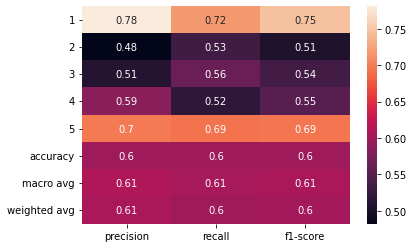

In [ ]:
clf_report = classification_report(y_star_test,
                                   preds_star,
                                   target_names=[1,2,3,4,5],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

### **Validate Model**

In [ ]:
def predict_rating(review_text):
  output_rating,model_ouputs_star = bert_star_model.predict(review_text)
  print("5 stars = 4, \n4 stars = 3, \n3 stars = 2, \n2 stars = 1, \n1 stars =0")    
  print(output_rating)

validate_stars = np.array(x_star_test.sample(10).values)
list_vals = validate_stars.tolist()
predict_rating(list_vals)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

5 stars = 4, 
4 stars = 3, 
3 stars = 2, 
2 stars = 1, 
1 stars =0
[4, 2, 2, 2, 2, 2, 4, 0, 2, 0]


# **Comparision with other models**

In [ ]:
nb = Pipeline([('vectorize', CountVectorizer(ngram_range=(1, 2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier()),
               ])

nn = KNeighborsClassifier(n_neighbors=5) 
knn = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', nn),
               ])

rf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(max_depth=2, random_state=0)),
               ])
svc = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC()),
               ])

In [ ]:
X_train = reviews_train
X_test = reviews_test
y_test = category_test
y_train = category_train

print('Naive Bayes')
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_nb)))
print("Recall: " + str(recall_score(y_test, y_pred_nb)))
print("Precision: " + str(precision_score(y_test, y_pred_nb)))
print("F1-score: " + str(f1_score(y_test, y_pred_nb)))

print('SGD Classifier')
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_sgd)))
print("Recall: " + str(recall_score(y_test, y_pred_sgd)))
print("Precision: " + str(precision_score(y_test, y_pred_sgd)))
print("F1-score: " + str(f1_score(y_test, y_pred_sgd)))

print('K-Nearest Neighbour')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_knn)))
print("Recall: " + str(recall_score(y_test, y_pred_knn)))
print("Precision: " + str(precision_score(y_test, y_pred_knn)))
print("F1-score: " + str(f1_score(y_test, y_pred_knn)))

print('Random Forest')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_rf)))
print("Recall: " + str(recall_score(y_test, y_pred_rf)))
print("Precision: " + str(precision_score(y_test, y_pred_rf)))
print("F1-score: " + str(f1_score(y_test, y_pred_rf)))

print('Linear SVC')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_svc)))
print("Recall: " + str(recall_score(y_test, y_pred_svc)))
print("Precision: " + str(precision_score(y_test, y_pred_svc)))
print("F1-score: " + str(f1_score(y_test, y_pred_svc)))

print('Logistic Regression')
logreg_category.fit(X_train, y_train)
y_pred_log = logreg_category.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_log)))
print("Recall: " + str(recall_score(y_test, y_pred_log)))
print("Precision: " + str(precision_score(y_test, y_pred_log)))
print("F1-score: " + str(f1_score(y_test, y_pred_log)))

Naive Bayes
Accuracy: 0.8809410646387833
Recall: 0.9853985793212312
Precision: 0.8432961837217157
F1-score: 0.9088262056414922
SGD Classifier
Accuracy: 0.9199144486692015
Recall: 0.9408050513022889
Precision: 0.9272656553870089
F1-score: 0.9339862879529873
K-Nearest Neighbour
Accuracy: 0.5453897338403042
Recall: 0.6227308602999211
Precision: 0.6224852071005917
F1-score: 0.6226080094693234
Random Forest
Accuracy: 0.6021863117870723
Recall: 1.0
Precision: 0.6021863117870723
F1-score: 0.7517057253040641
Linear SVC
Accuracy: 0.9203897338403042
Recall: 0.9368587213891081
Precision: 0.9313456257355825
F1-score: 0.9340940389533738
Logistic Regression
Accuracy: 0.9184885931558935
Recall: 0.9411996842936069
Precision: 0.9247770453664211
F1-score: 0.932916096225308
